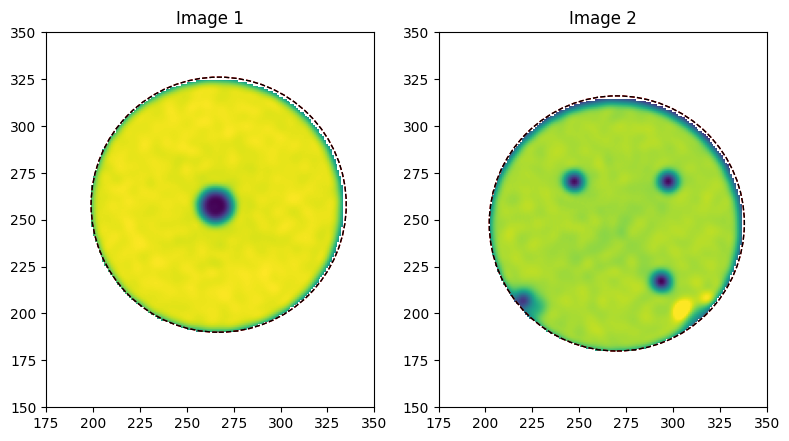

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pydicom

# Path to DICOM files
strread1 = 'E:\\Otway_cores\\Otway1\\otway_ca_drain\\1.2.840.113619.2.55.3.1829384975.487.1696287290.867_0001_000002_16983383943d48.v2'
strread2 = 'E:\\Otway_cores\\Otway1\\otway_ca_drain\\1.2.840.113619.2.55.3.1829384975.487.1696287290.867_0001_000167_16983384003ded.v2'

def read_dicom_file(file_path: str) -> np.ndarray:
    #Read a DICOM file from the given path
    dicom_file = pydicom.dcmread(file_path, force = "True")
    dicom_file.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian  
    return dicom_file.pixel_array.astype(float)

    
def center_rock_sample(image: np.ndarray, cx: int, cy: int, cr: int) -> np.ndarray:
    #centering correction 
    nr, nc = image.shape
    xx, yy = np.meshgrid(range(1, nr + 1), range(1, nc + 1), indexing='ij')
    c_mask = ((xx - cx) ** 2 + (yy - cy) ** 2 <= cr ** 2)
    dummy = np.ones_like(image)
    dummy *= c_mask
    dummy[dummy == 0] = np.nan
    centered_image = image * dummy
    return centered_image

cx1, cy1, cr1, cr_1 = 258, 267, 68, 68
cx2, cy2, cr2, cr_2 = 248, 270, 68, 68

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
image1 = center_rock_sample(read_dicom_file(strread1), cx=cx1, cy=cy1, cr=cr1)
axes[0].imshow(image1)
axes[0].add_patch(Circle((cy1, cx1), cr1, fill=False, linestyle='--', color='r'))
axes[0].add_patch(Circle((cy1, cx1), cr_1, fill=False, linestyle='--', color='k'))
axes[0].set_title('Image 1')
axes[0].set_xlim(175, 350)
axes[0].set_ylim(150, 350)

image2 = center_rock_sample(read_dicom_file(strread2), cx=cx2, cy=cy2, cr=cr2)
axes[1].imshow(image2)
axes[1].add_patch(Circle((cy2, cx2), cr2, fill=False, linestyle='--', color='r'))
axes[1].add_patch(Circle((cy2, cx2), cr_2, fill=False, linestyle='--', color='k'))
axes[1].set_title('Image 2')
axes[1].set_xlim(175, 350)
axes[1].set_ylim(150, 350)

plt.tight_layout()
plt.show()